In [387]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *
import pickle
#from IPython.core.display import display, HTML

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

In [388]:
# importing dataset
df_adult_eda = pd.read_csv("datasets/adult_census_income/adult.data")
df_adult_eda.columns = [
    "age",
    "workclass", 
    "fnlwgt",
    "education",
    "education.num",
    "marital.status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital.gain",
    "capital.loss",
    "hours.per.week",
    "native.country",
    "income"
]
df_adult_eda.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [389]:
df_adult_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education.num   32560 non-null  int64 
 5   marital.status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital.gain    32560 non-null  int64 
 11  capital.loss    32560 non-null  int64 
 12  hours.per.week  32560 non-null  int64 
 13  native.country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [390]:
df_adult_eda["income"].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [391]:
print("Initial shape of the dataset: ", df_adult_eda.shape)

Initial shape of the dataset:  (32560, 15)


In [392]:
#Dropping duplicate rows
#drop_duplicates (eliminar duplicado)
df_adult_eda = df_adult_eda.drop_duplicates(keep="first")
print("new shape: ", df_adult_eda.shape)
#24 registers deleted

new shape:  (32536, 15)


In [393]:
df_adult_eda.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [394]:
# filtering every category with a clean value without empty spaces
# aplicar limpieza de vacios en variable categoricas
df_cat_cols = df_adult_eda.select_dtypes(include="object").columns.to_list()

def replace_vals(item):
    return item.replace(" ","")

for cat in df_cat_cols: 
    df_adult_eda[cat] = list(map(replace_vals,df_adult_eda[cat].values))
    print(df_adult_eda[cat].unique())

['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

In [395]:
#existe 73 tipos de edades
df_adult_eda["age"].nunique()

73

In [396]:
#obtener lista de valores unicos
df_adult_eda["workclass"].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [397]:
# cehcking null values in columns
df_adult_eda.isnull().sum(axis=0)
#there is no null values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [398]:
# filter symbol
for i in df_adult_eda.columns:
    #contamos la actual columna
    conteo_curr_col = df_adult_eda[i].value_counts()

    #listamos el indice del conteo
    dic_conteo = list(conteo_curr_col.index)
    
    # recorriendo diccionario de valores
    for col_feature in dic_conteo:
        if col_feature == "?":
            print("value counts of ? in",i)
            print(conteo_curr_col[col_feature])

value counts of ? in workclass
1836
value counts of ? in occupation
1843
value counts of ? in native.country
582


In [399]:
# Dropping the rows whose is ?
#first removing data
df_adult_eda = df_adult_eda[df_adult_eda.occupation != "?"]
df_adult_eda = df_adult_eda[df_adult_eda["native.country"] != "?"]

In [400]:
# filter symbol
for i in df_adult_eda.columns:
    #contamos la actual columna
    conteo_curr_col = df_adult_eda[i].value_counts()

    #listamos el indice del conteo
    dic_conteo = list(conteo_curr_col.index)
    
    # recorriendo diccionario de valores
    for col_feature in dic_conteo:
        if col_feature == "?":
            print("value counts of ? in",i)
            print(conteo_curr_col[col_feature])

In [401]:
# minimum age
#en le indice de fila con el minmo valor y columna tal 
#usando la funcion at
df_adult_eda.at[df_adult_eda["age"].idxmin(),"age"]

17

### Exploratory Data Analysis

In [402]:
# This distribution plot shows the distribution of people age across data set

#modifying matplot global params
plt.rcParams["figure.figsize"] = [12,8]
sns.set(style="whitegrid")

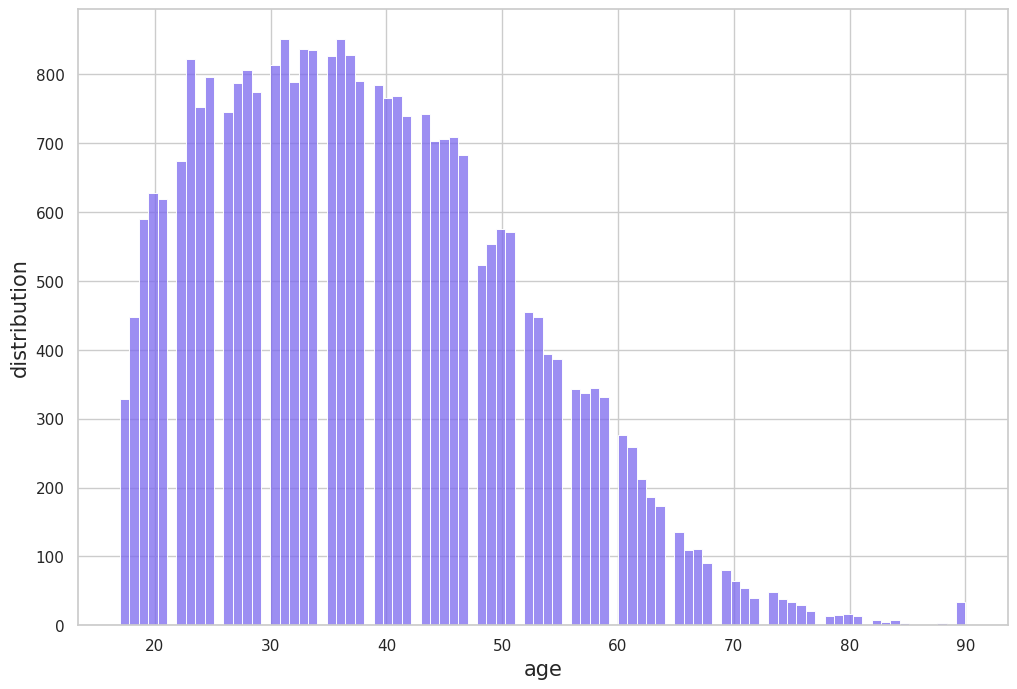

In [403]:
sns.histplot(df_adult_eda["age"], bins=90, color="mediumslateblue")
plt.ylabel("distribution", fontsize=15)
plt.xlabel("age", fontsize=15)
plt.show()
#plt.margins(x=0)

In [404]:
print("maximum age is", df_adult_eda["age"].max())
print("minimum age is", df_adult_eda["age"].min())

maximum age is 90
minimum age is 17


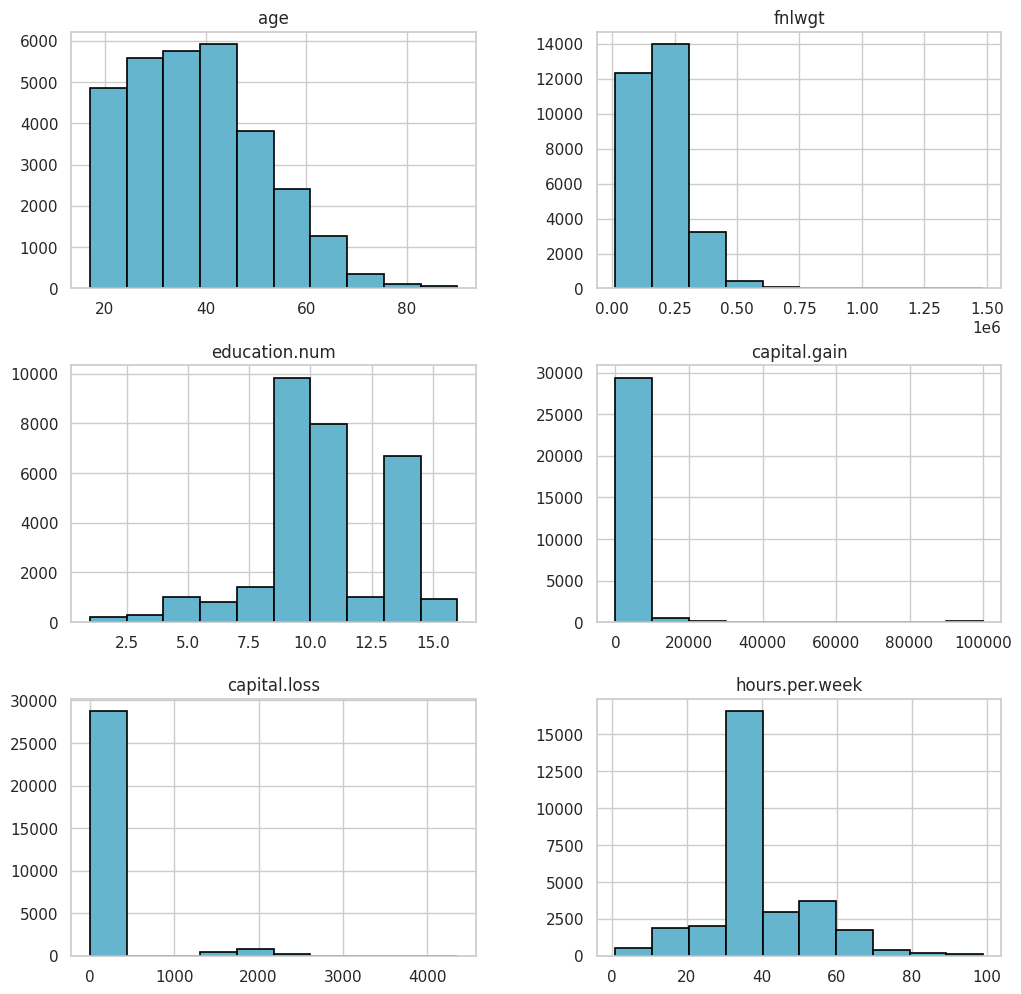

In [405]:
#Distribution of different features of the dataset
# numeric features

#capturar le figura con gcf get current figure (hist de pandas)
distribution = df_adult_eda.hist(edgecolor="black", linewidth=1.2, color="c")
fig = plt.gcf()
#setear tamanio de figura el pulgadas
fig.set_size_inches(12,12)
plt.show()

In [406]:
# checking the difference between mean values and median
# in order to see outliers

# hours.per.week
cols_num = df_adult_eda.select_dtypes(include="number").columns.to_list()
for col_num in cols_num:
    print(col_num)
    print("Median\t{:.2f}".format(df_adult_eda[col_num].median()))
    print("Mean\t{:.2f}".format(df_adult_eda[col_num].mean()))
    print()

age
Median	37.00
Mean	38.44

fnlwgt
Median	178419.00
Mean	189798.75

education.num
Median	10.00
Mean	10.12

capital.gain
Median	0.00
Mean	1092.81

capital.loss
Median	0.00
Mean	88.44

hours.per.week
Median	40.00
Mean	40.93



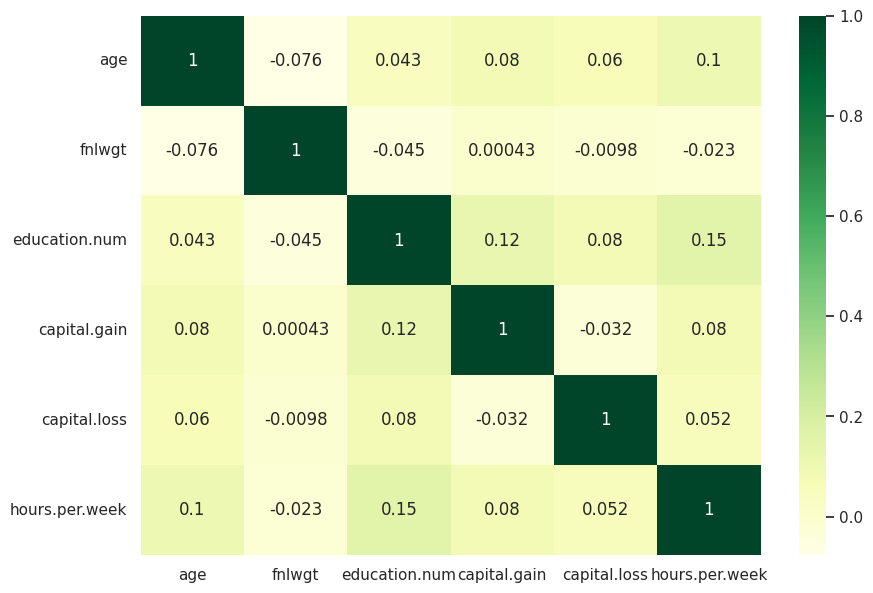

In [407]:
# heatmap correlatoin
df_adult_num =df_adult_eda.select_dtypes(include="number")
plt.figure(figsize=(10,7))
sns.heatmap(df_adult_num.corr(), annot=True, color="blue", cmap="YlGn")
plt.show()
# none feature has a coorrelation all seems an individual feauture

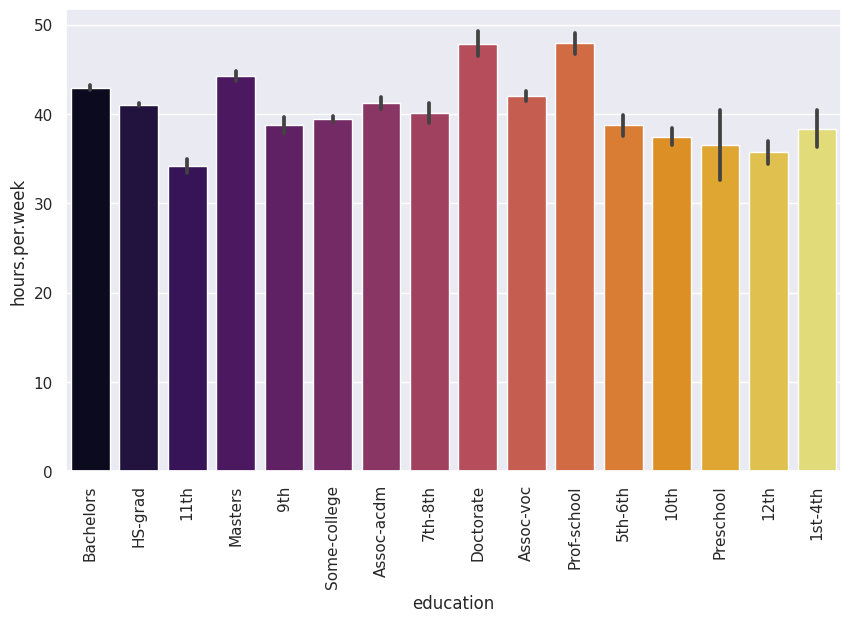

In [408]:
# plot hours per week according to the education of the person
# normally is 40 hours by week 4 hours by day in 5 days

#alter matplot params in sns with rc param runtime conf params
# here like a dictionary
sns.set(rc={"figure.figsize": (10,6)})
sns_grad = sns.barplot(
    x = df_adult_eda["education"],
    y = df_adult_eda["hours.per.week"],
    data = df_adult_eda,
    palette="inferno"
)
#configurar sobre el actual plot
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

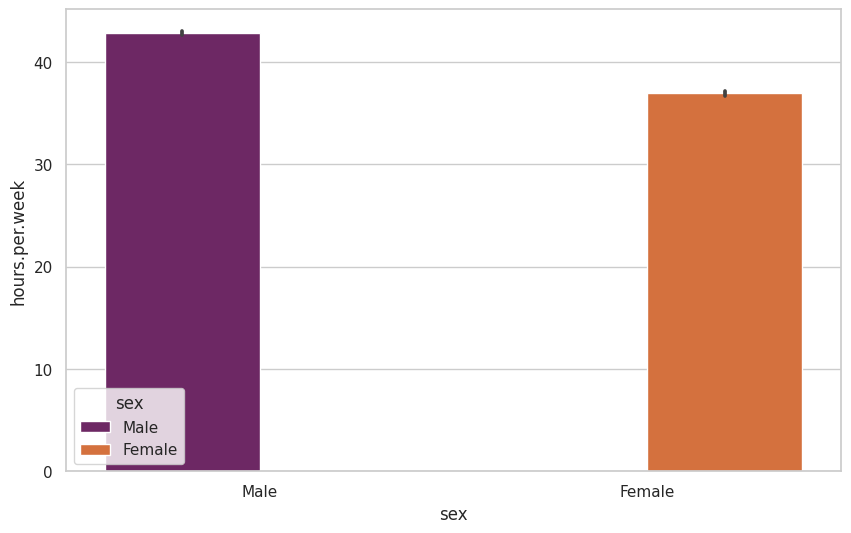

In [409]:
# focuse on hours per week with sex
# bar graph with difference of hours per week between male and female

# con rcparams y style properties
sns.set(style="whitegrid", rc={"figure.figsize":(10,6)})
sns.barplot(
    x="sex",
    y="hours.per.week",
    data=df_adult_eda,
    estimator=mean,
    hue="sex",
    palette = "inferno"
)
plt.show()

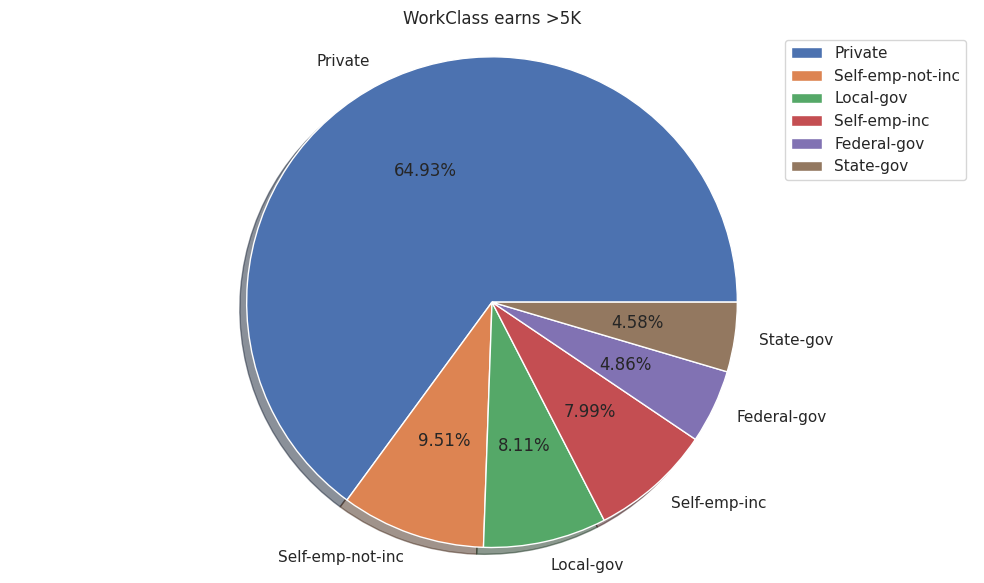

In [410]:
# workclasses whose income is higher than 50k (only >50K)
df_ = df_adult_eda.loc[df_adult_eda["income"] == ">50K",["workclass"]]
workclass_types = df_["workclass"].value_counts()

#return type rows of evert workclass
labels = list(workclass_types.index)

#cast only inside data of counting in aggregate
aggregate = list(workclass_types)

# pie of percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct="%1.2f%%", shadow=True)
plt.legend(labels, loc="best")
plt.title("WorkClass earns >5K")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [411]:
# Grouping people by their education
# different form with grouby has the name of the column #it consider nans
# with value_counts it only consider  it return a serie usin only one column
education_size = df_adult_eda.groupby("education").size()
education_size_g = df_adult_eda["education"].value_counts()
print(education_size)

education
10th             820
11th            1048
12th             377
1st-4th          149
5th-6th          287
7th-8th          556
9th              455
Assoc-acdm      1008
Assoc-voc       1307
Bachelors       5041
Doctorate        375
HS-grad         9834
Masters         1626
Preschool         44
Prof-school      542
Some-college    6669
dtype: int64


In [412]:
# Grouping people who earns >50K by their education
more_income = df_adult_eda.loc[df_adult_eda["income"]==">50K",["education"]].groupby("education").size()
print(more_income)

education
10th              59
11th              59
12th              29
1st-4th            6
5th-6th           12
7th-8th           35
9th               25
Assoc-acdm       256
Assoc-voc        344
Bachelors       2126
Doctorate        280
HS-grad         1616
Masters          918
Prof-school      406
Some-college    1335
dtype: int64


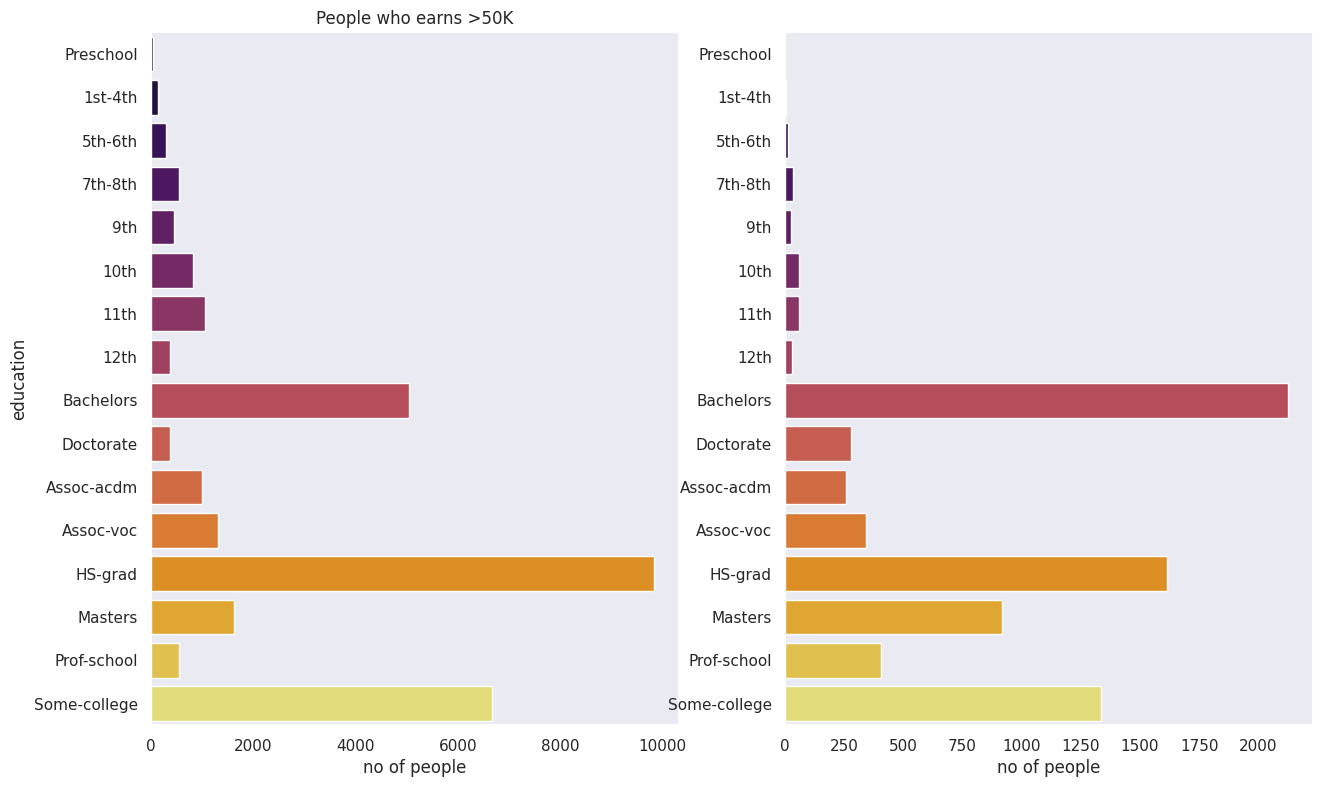

In [413]:

sns.set(style = "dark")
plt.rcParams["figure.figsize"] = [15,9]
# aveces tambien sin fig y ax
# o usar el respectivo ax envez de subplot
fig, ax = plt.subplots(1,2)

ax[0].set_ylabel("education")
ax[0].set_xlabel("no of people")
ax[1].set_xlabel("no of people")
ax[0].title.set_text("People grouped by their education")
ax[0].title.set_text("People who earns >50K")

# puedes colocar en que subplot ira cada sns
# usando ax parametro
# barplot for the people grouped by their education
sns_ed_1 = sns.barplot(
    x=list(education_size), 
    y=list(education_size.index),
    palette="inferno",
    order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
           'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'],
    ax = ax[0]
)

# barplot  for people earns >50K grouped by education
sns_ed_2 = sns.barplot(
    x=list(more_income),
    y=list(more_income.index),
    palette="inferno",
    order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
           'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'],
    ax = ax[1]
)

In [414]:
df_adult_eda["occupation"].unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [415]:
conteo_with_income = (df_adult_eda[["native.country","income"]])
datasize_with_income = pd.merge(
        df_adult_eda.groupby(["native.country","income"]).size().reset_index(name="ind_size"),
        df_adult_eda.groupby("native.country").size().reset_index(name="total"), 
        on="native.country"
    )
#print(datasize_with_income)
df_piv = datasize_with_income.pivot(columns=["income"],index=["native.country","total"])
df_group_by_size = df_adult_eda.groupby(["native.country","income"]).size().reset_index(name="ind_size")

In [416]:
df_group_by_size

,native.country,income,ind_size
0,Cambodia,<=50K,11
1,Cambodia,>50K,7
2,Canada,<=50K,71
3,Canada,>50K,36
4,China,<=50K,48
...,...,...,...
75,United-States,>50K,6993
76,Vietnam,<=50K,59
77,Vietnam,>50K,5
78,Yugoslavia,<=50K,10


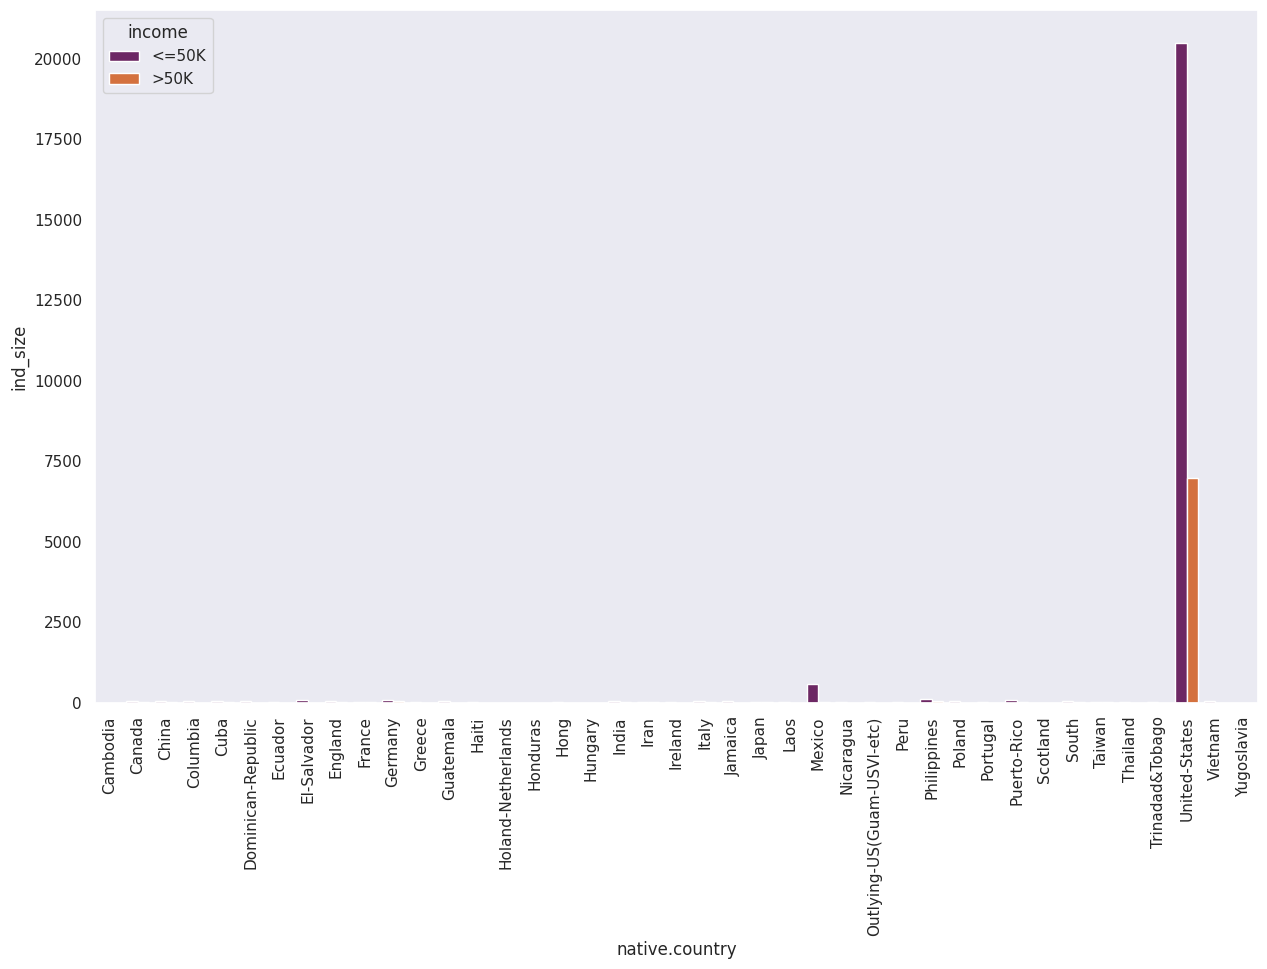

In [417]:
sns.barplot(data=df_group_by_size, x="native.country", y="ind_size", hue="income", palette="inferno")
plt.xticks(rotation=90)
plt.show()

In [418]:
# without US
df_new_group = df_group_by_size[df_group_by_size["native.country"]!="United-States"]

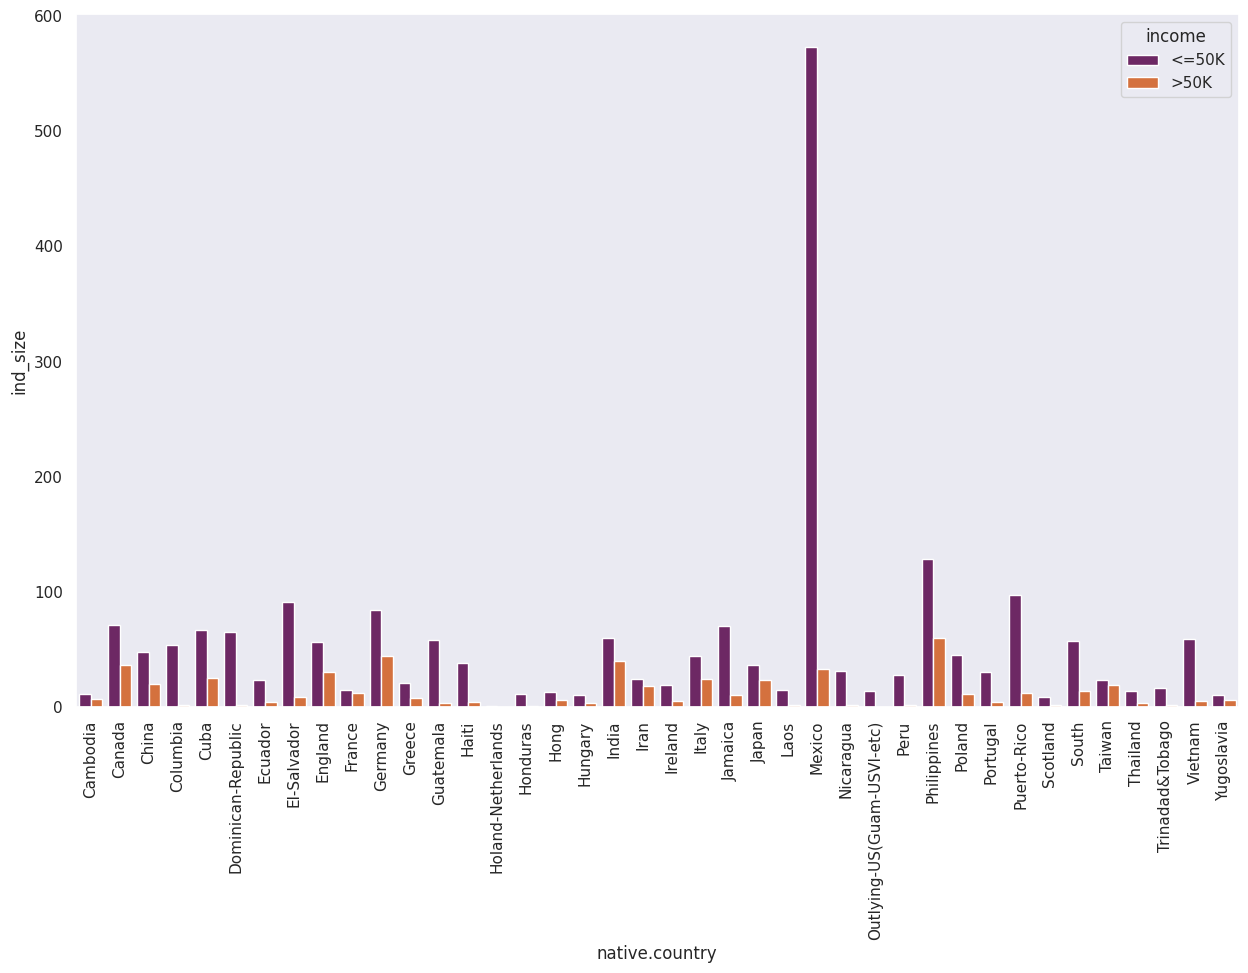

In [419]:
sns.barplot(data=df_new_group, x="native.country", y="ind_size", hue="income", palette="inferno")
plt.xticks(rotation=90)
plt.show()

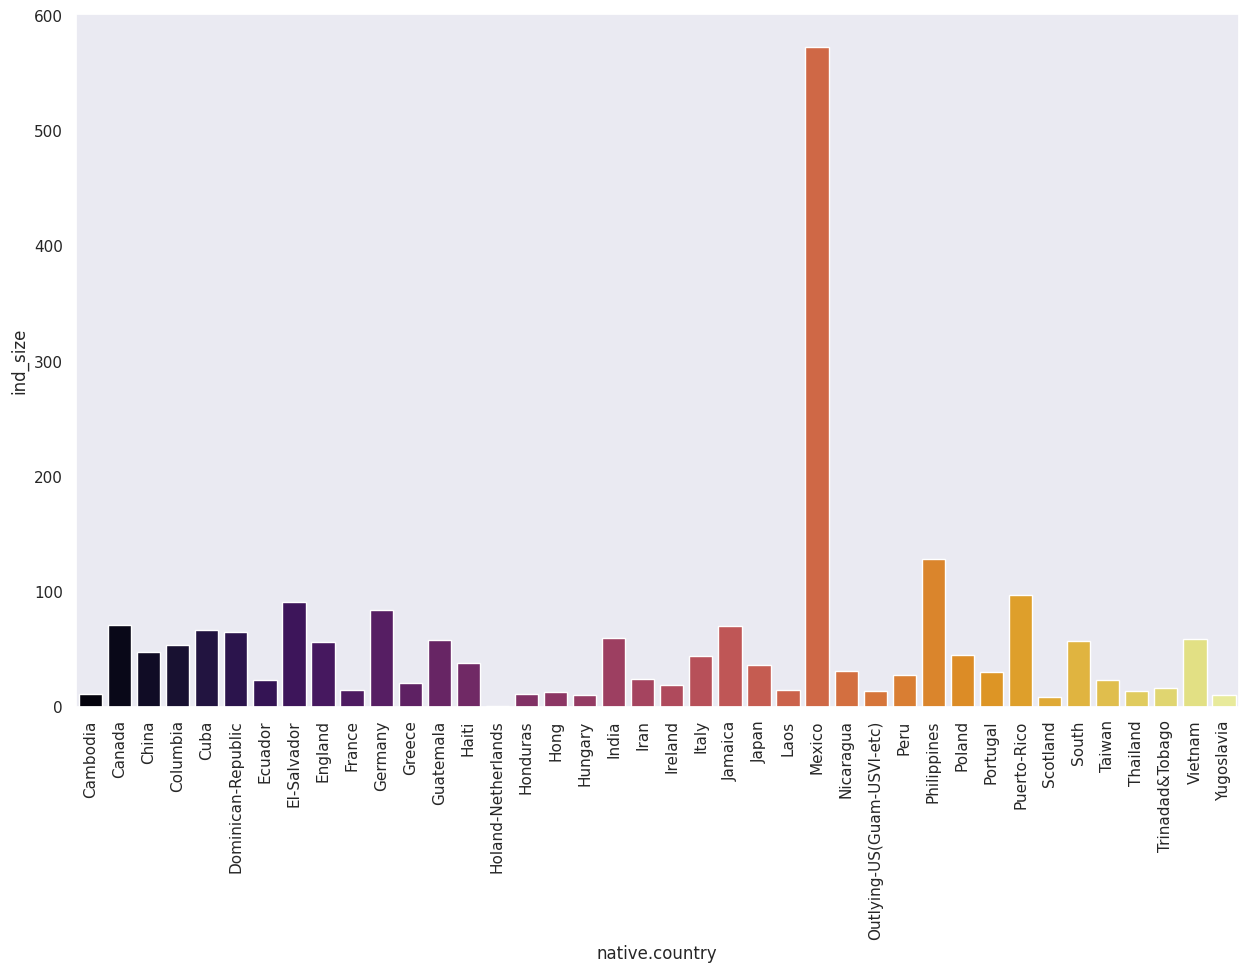

In [420]:
df_less_fifty = df_new_group[df_new_group["income"]=="<=50K"]
sns.barplot(data=df_less_fifty, x="native.country", y="ind_size", palette="inferno")
plt.xticks(rotation=90)
plt.show()

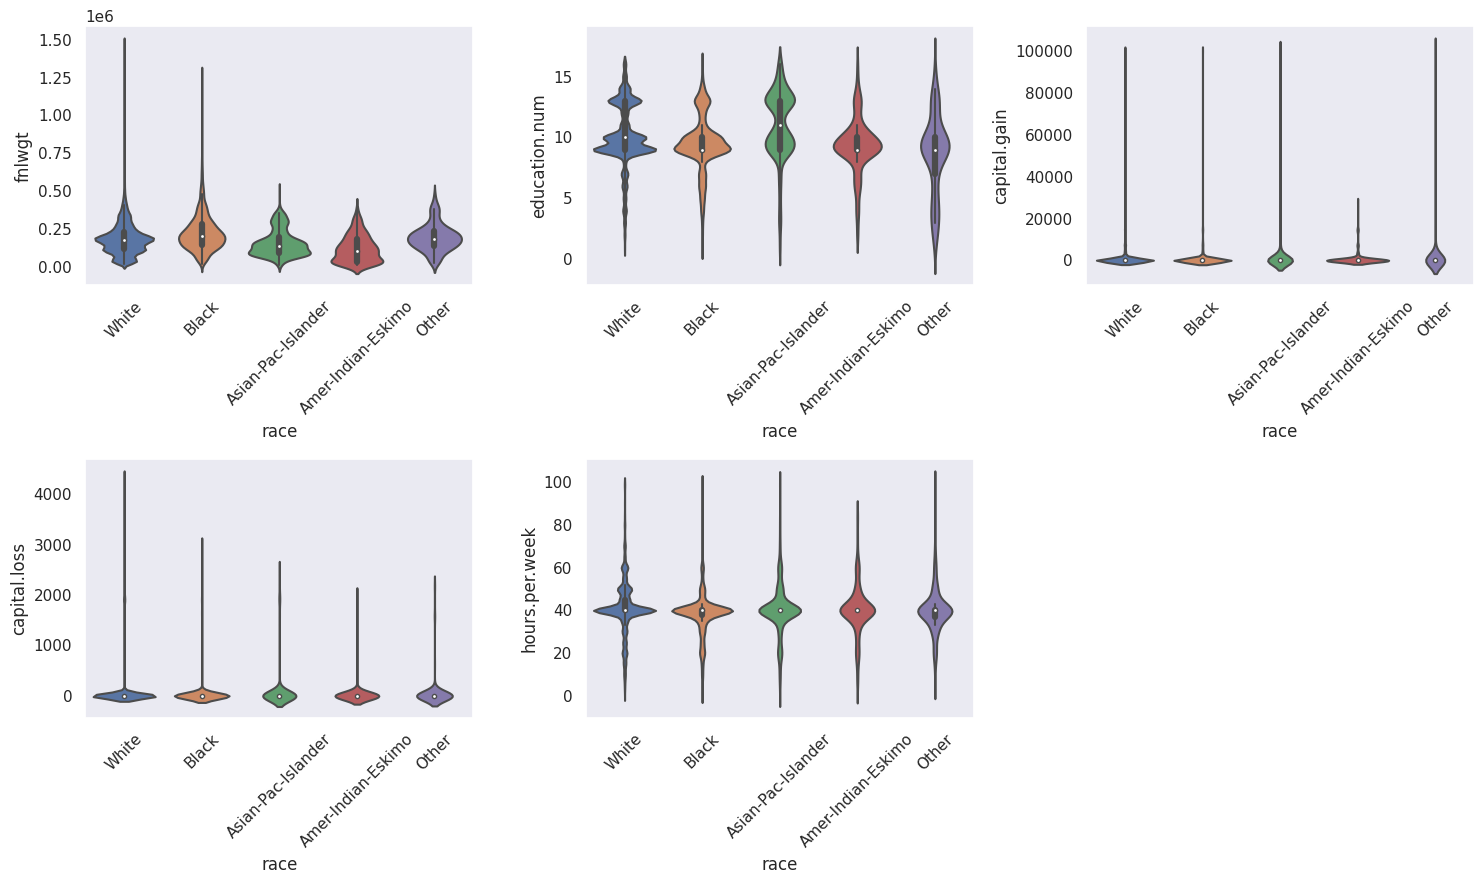

In [421]:
# comparing numeric data with race

#violiin plot
df_cols = df_adult_eda.select_dtypes(include="number").columns.to_list()[1:]

for i in range(len(df_cols)):
    plt.subplot(2,3,i+1)
    sns.violinplot(
        x="race", y=df_cols[i], data=df_adult_eda
    )
    plt.xticks(rotation=45)
    plt.tight_layout()

In [422]:
def combine_cat_with_income(cat_name):
# race with incomes

    fig, ax = plt.subplots(1,2)

    ax[0].set_ylabel("no of people")
    ax[0].set_xlabel(cat_name)
    ax[1].set_xlabel(cat_name)
    ax[0].title.set_text("People who earn <=50K")
    ax[0].title.set_text("People who earns >50K")

    #group people income with relationship
    less = df_adult_eda.loc[df_adult_eda["income"]=="<=50K",[cat_name]].groupby(cat_name).size()
    more = df_adult_eda.loc[df_adult_eda["income"]==">50K",[cat_name]].groupby(cat_name).size()

    #barplot earn more or less than 50k according to relationship
    sns_rel_1 = sns.barplot(x=list(less.index), y=list(less), ax=ax[0])
    sns_rel_2 = sns.barplot(x=list(more.index), y=list(more), ax=ax[1])
    plt.setp(sns_rel_1.get_xticklabels(), rotation = 60);
    plt.setp(sns_rel_2.get_xticklabels(), rotation = 60);

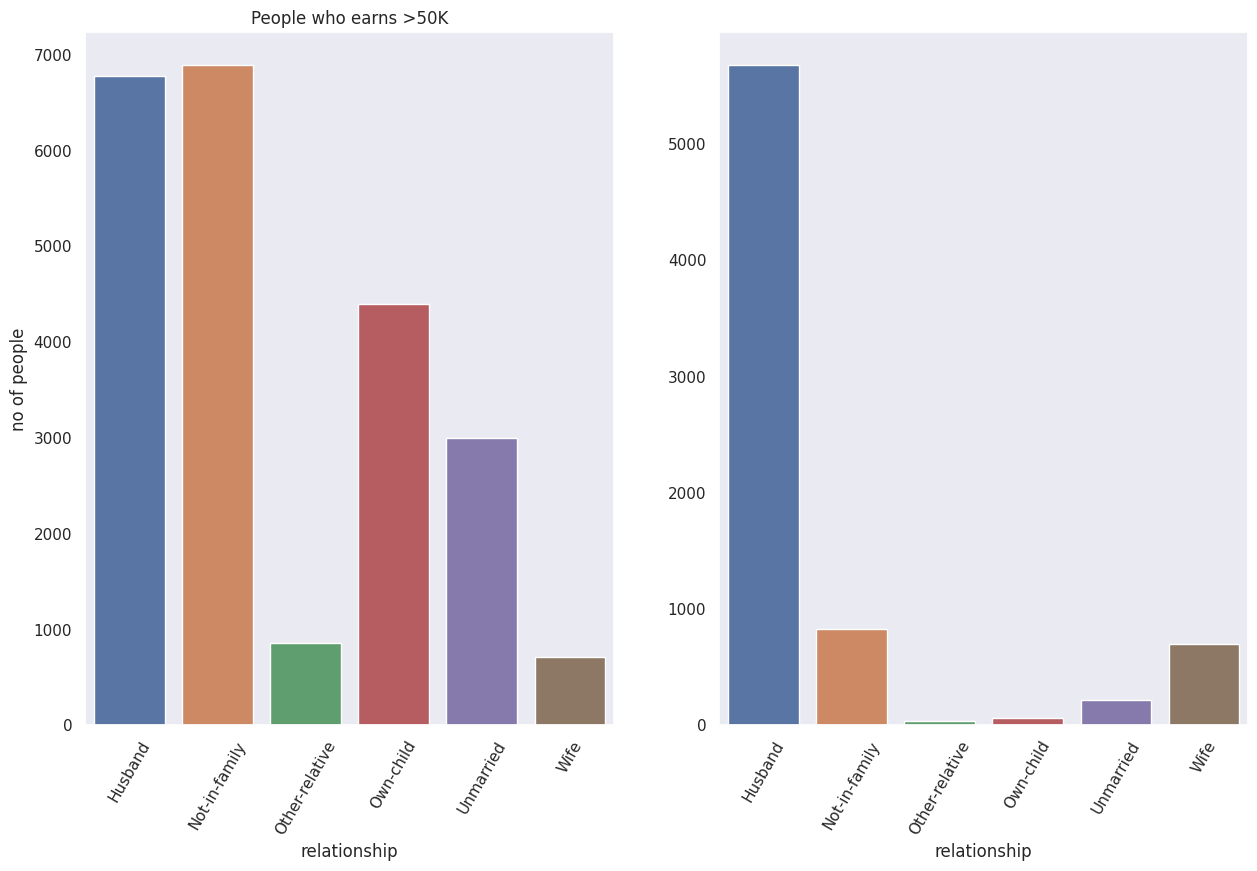

In [423]:
combine_cat_with_income("relationship")

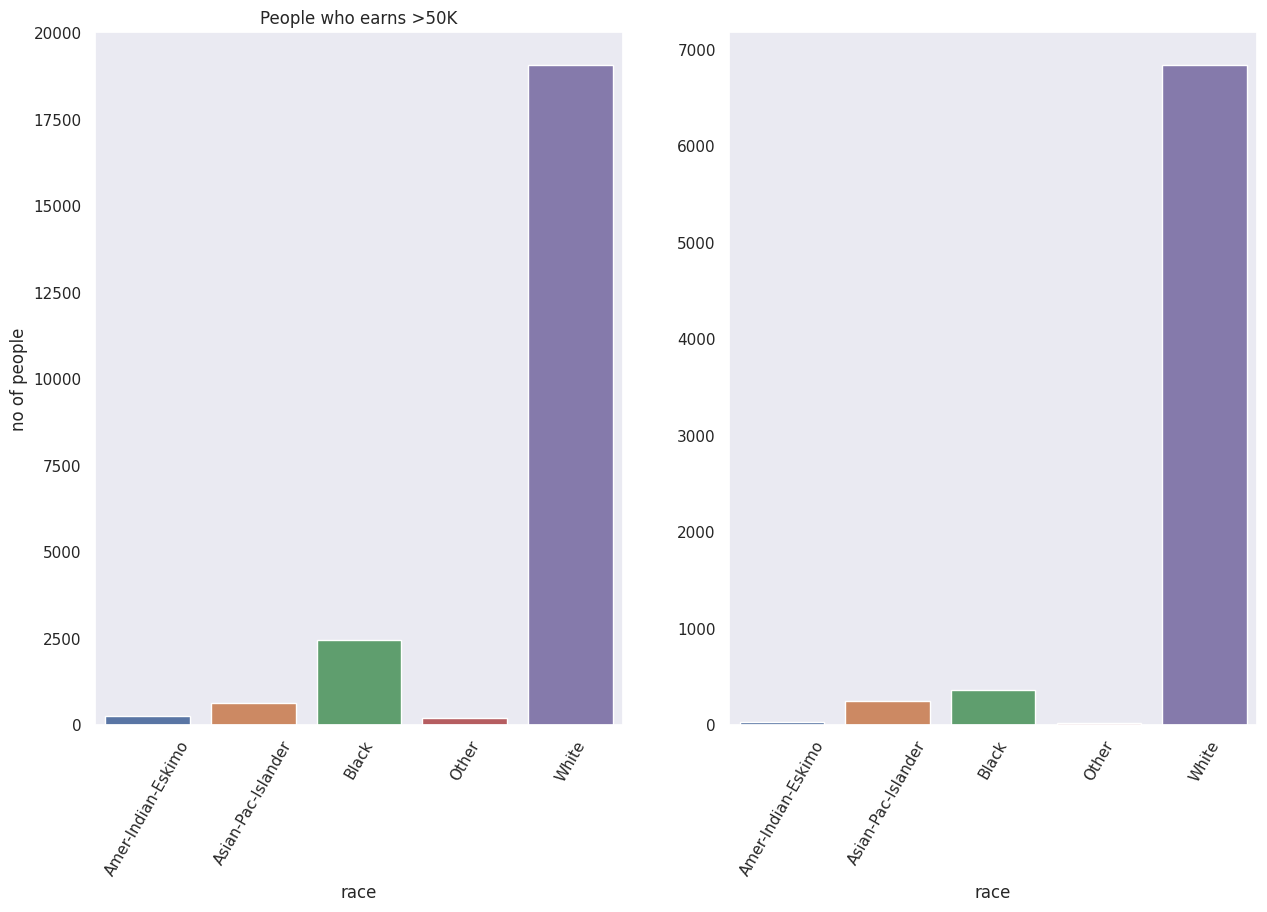

In [424]:
combine_cat_with_income("race")

### Preprocessing

In [425]:
#copying adult_eda and reset index
df_adult = df_adult_eda.copy()
#borrar el index anterior
df_adult = df_adult.reset_index(drop=True)
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [426]:
#count mean std max min percentiles
#numeric features
df_adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30138.000000,3.013800e+04,30138.000000,30138.000000,30138.000000,30138.000000
mean,38.441702,1.897988e+05,10.122437,1092.805329,88.442863,40.934734
std,13.131643,1.056584e+05,2.548727,7409.230902,404.451628,11.978951
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176295e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784190e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376062e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [427]:
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [428]:
# changin income column into numerical value
#puede aplicar un diccionario con key y value a reemplazar
df_adult["income"] = df_adult["income"].map({"<=50K":0,">50K":1})

In [429]:
df_adult["income"].value_counts()

0    22632
1     7506
Name: income, dtype: int64

In [430]:
# changing the categorical values to numerical
#using LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical_features = df_adult.select_dtypes(include="object").columns.to_list()
label_encoder_feat = {}
mapping_dict = {}
for i, feature in enumerate(categorical_features):
    # create a labelencoder for current feature
    label_encoder_feat[feature] = LabelEncoder()
    #use labelenconder to fit with current feature data
    df_adult[feature] = label_encoder_feat[feature].fit_transform(df_adult[feature])
    le_name_mapping = dict(zip(label_encoder_feat[feature].classes_,label_encoder_feat[feature].transform(label_encoder_feat[feature].classes_)))
    mapping_dict[i] = le_name_mapping

df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [431]:
for i, feature in enumerate(categorical_features):
    print(mapping_dict[i],"\n")

{'Federal-gov': 0, 'Local-gov': 1, 'Private': 2, 'Self-emp-inc': 3, 'Self-emp-not-inc': 4, 'State-gov': 5, 'Without-pay': 6} 

{'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15} 

{'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6} 

{'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13} 

{'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5} 

{'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4} 

{'F

The label encoders are saved for each of the feature converted so that they can be decoded at the end.
- for feature, encoder in label_encoder_feat.items():
- df_adult[feature] = encoder.inverse_transform(df_adult[feature])

In [432]:
# Shuffling dataset
from sklearn.utils import shuffle
df_adult = shuffle(df_adult)

#splitting data into train and test set
from sklearn.model_selection import train_test_split

# fnlwgt es un feature importante pero por razones de deployment
# este feature es dificil de determinar
# al ser una estimacion de varias unidades estadisticas 

#The estimation methodology for the CPS is a highly complex 
#set of statistical procedures. A complete discussion of 
#the estimation process can be found in chapter 10 of 
#Design and methodology: Current Population Survey, 
#Technical Paper 66.
#https://www.census.gov/housing/hvs/files/tp-66.pdf

#el education.num esta por encima del education pero 
# ambas variables son equivalente nos quedaremos con la categorica
# por ser de facil visualizacion durante el deployment 
# en vez el número de anios estudiados

# el feature de sex es la menos imporntante pero eliminando
# dicha feature no mejora el modelo objetivo que buscamos
# por lo cual se deja esta feature adicional

features_ = df_adult.drop(columns=["income","fnlwgt","education.num"])
target = df_adult["income"]
# 30% testing 70% training
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size=0.3, random_state=0)
print("train data: ",X_train.shape)
print("test data: ",X_test.shape)

train data:  (21096, 12)
test data:  (9042, 12)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

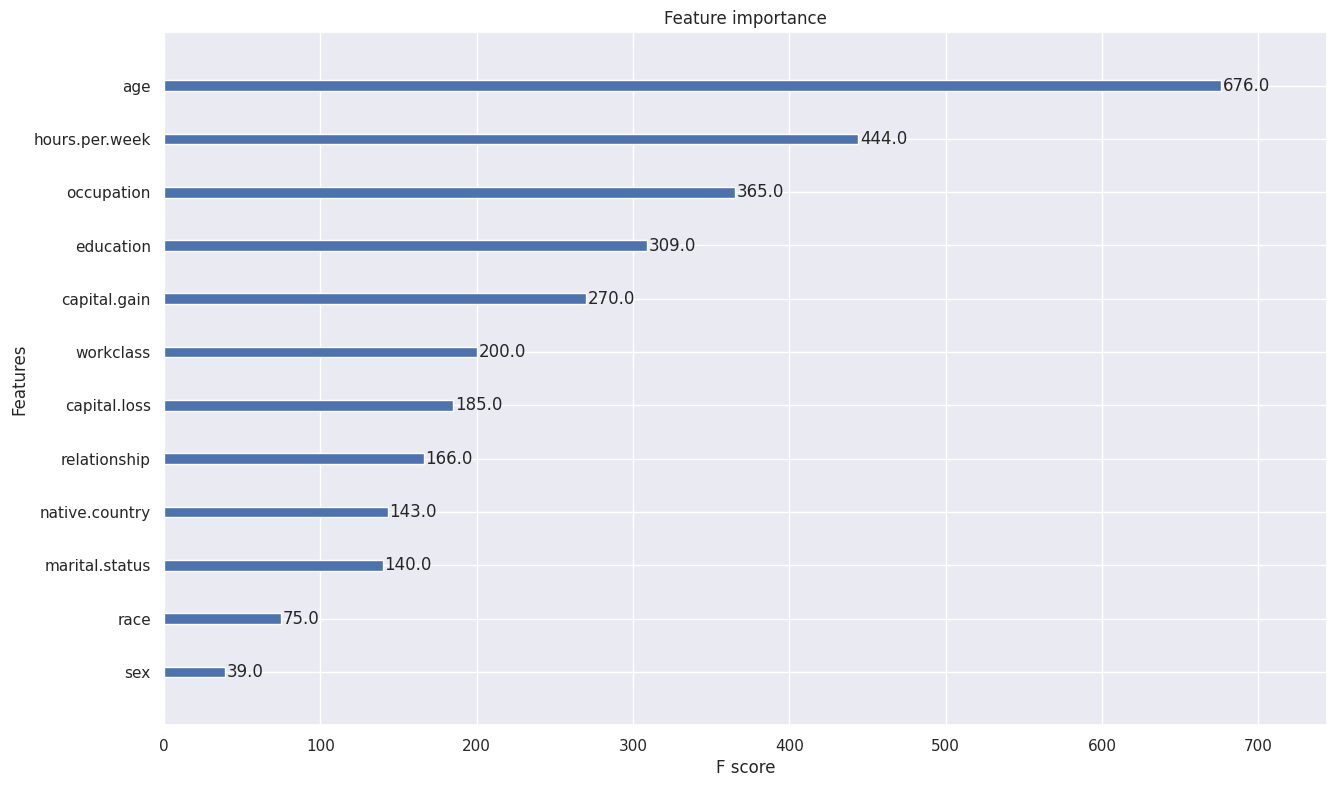

In [433]:
# plotting feature importances
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier()
model_importance = model.fit(X_train, y_train)
plot_importance(model_importance)

### Machine Learning Models

#### Model 1: Logistics Regression

In [434]:
# training model1

logistic = LogisticRegression(C=0.5, max_iter=500)
model_1 = logistic.fit(X_train, y_train)

#Predictions
pred_1 = model_1.predict(X_test)

print("Accuracy of model 1: ", accuracy_score(y_test,pred_1))
print("F1 Score of model 1: ", f1_score(y_test,pred_1, average="binary"))

Accuracy of model 1:  0.7971687679716877
F1 Score of model 1:  0.43811274509803927


/home/chris/LearningProjects/venvs/v_jupy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Model_2: Random Forest

In [435]:
r_forest = RandomForestClassifier(n_estimators=200)
model_2 = r_forest.fit(X_train.values, y_train.values)

#Predictions
pred_2 = model_2.predict(X_test)
print("Accuracy of model 2: ", accuracy_score(y_test,pred_2))
print("F1 Score of model 2: ", f1_score(y_test,pred_2, average="binary"))

/home/chris/LearningProjects/venvs/v_jupy/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy of model 2:  0.8456093784560937
F1 Score of model 2:  0.6676190476190476


In [436]:
## Saving the model
pickle.dump(model_2, open("model.pkl","wb"))
# for loading use
#pickle.load(open("model.pkl","rb"))
#pickle_model.predict(X_test)

In [437]:
# Visualizacion de la importancia de features
# genial cuando crea series parte de la estructura
# de un dataframe
features_scores = pd.Series(
    model_2.feature_importances_,
    index = X_train.columns
).sort_values(ascending=False)

features_scores

age               0.223120
capital.gain      0.132274
hours.per.week    0.111870
relationship      0.102889
education         0.102473
occupation        0.099081
marital.status    0.080968
workclass         0.051826
capital.loss      0.044199
native.country    0.019432
race              0.017747
sex               0.014120
dtype: float64

#### Model_3: Boosted Gradient Descent

In [438]:
boosted_gd = XGBClassifier(learning_rate=0.35, n_estimator=500)
model_3 = boosted_gd.fit(X_train, y_train)

#Predictions
pred_3 = model_3.predict(X_test)

print("Accuracy of model 3: ", accuracy_score(y_test,pred_3))
print("F1 Score of model 3: ", f1_score(y_test,pred_3, average="binary"))

[22:36:48] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

Accuracy of model 3:  0.8679495686794957
F1 Score of model 3:  0.7197183098591549


#### Mode_4: Bernoulli NB

In [439]:
nb_model = BernoulliNB(alpha=0.3)
model_4 = nb_model.fit(X_train, y_train)

#Predictions
pred_4 = model_4.predict(X_test)
print("Accuracy of model 4: ", accuracy_score(y_test,pred_4))
print("F1 Score of model 4: ", f1_score(y_test,pred_4, average="binary"))

Accuracy of model 4:  0.7247290422472904
F1 Score of model 4:  0.5647840531561462


#### Model_5: Support Vector Classifier

In [440]:
svc = SVC(kernel ="rbf", max_iter =1000, probability=True)
model_5 = svc.fit(X_train, y_train)

#Predictions
pred_5 = model_5.predict(X_test)
print("Accuracy of model 5: ", accuracy_score(y_test,pred_5))
print("F1 Score of model 5: ", f1_score(y_test,pred_5, average="binary"))

/home/chris/LearningProjects/venvs/v_jupy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy of model 5:  0.20979871709798717
F1 Score of model 5:  0.34503620863507195


### Analysis of the model performances

In [441]:
list_pred = [pred_1,pred_2,pred_3,pred_4,pred_5]
model_names = [
    "Logistic Regression",
    "Random Forest Classifier",
    "Boosted Gradient Descent",
    "Bernoulli NB",
    "SVC"
]

for i, predictions in enumerate(list_pred):
    print("Classification Report of ",model_names[i])
    print()
    print(classification_report(y_test, predictions, target_names=["<=50K",">50K"]))

Classification Report of  Logistic Regression

              precision    recall  f1-score   support

       <=50K       0.81      0.96      0.88      6773
        >50K       0.72      0.32      0.44      2269

    accuracy                           0.80      9042
   macro avg       0.76      0.64      0.66      9042
weighted avg       0.78      0.80      0.77      9042

Classification Report of  Random Forest Classifier

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6773
        >50K       0.73      0.62      0.67      2269

    accuracy                           0.85      9042
   macro avg       0.80      0.77      0.78      9042
weighted avg       0.84      0.85      0.84      9042

Classification Report of  Boosted Gradient Descent

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      6773
        >50K       0.77      0.68      0.72      2269

    accuracy                   

In [442]:
# Confussion Matrix for the classifier
for i, pred in enumerate(list_pred):
    print("The Confusion Matrix of: ", model_names[i])
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    print()

The Confusion Matrix of:  Logistic Regression
      0    1
0  6493  280
1  1554  715

The Confusion Matrix of:  Random Forest Classifier
      0     1
0  6244   529
1   867  1402

The Confusion Matrix of:  Boosted Gradient Descent
      0     1
0  6315   458
1   736  1533

The Confusion Matrix of:  Bernoulli NB
      0     1
0  4938  1835
1   654  1615

The Confusion Matrix of:  SVC
     0     1
0   15  6758
1  387  1882



/home/chris/LearningProjects/venvs/v_jupy/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


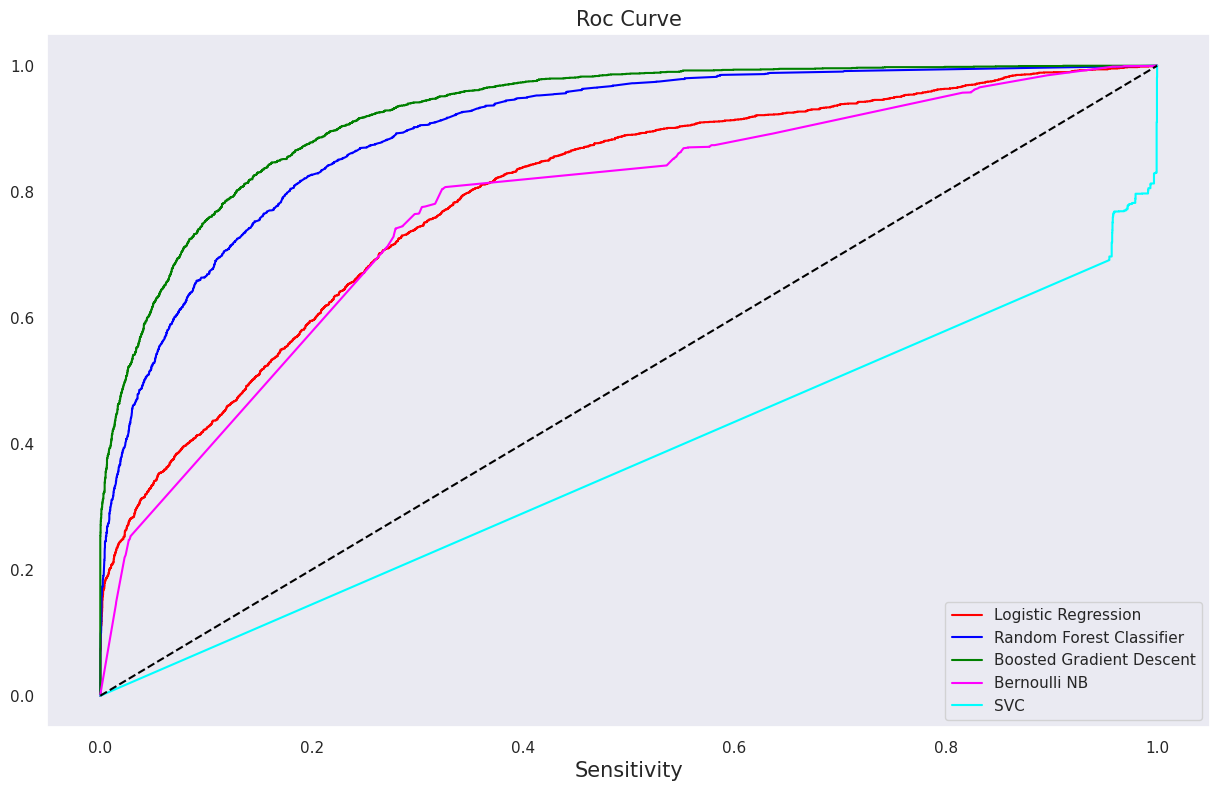

In [443]:
# Roc Curve for classification model
models = [model_1,model_2,model_3,model_4,model_5]
color = ["red","blue","green","fuchsia","cyan"]
plt.title("Roc Curve", fontsize=15)
plt.xlabel("Specificity", fontsize=15)
plt.xlabel("Sensitivity", fontsize=15)

i=1
for i, model in enumerate(models):
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color=color[i])
    plt.gca().legend(model_names, loc="lower right", frameon=True)
plt.plot([0,1],[0,1],linestyle="--", color="black")
plt.show()

#### Testing Data View

In [444]:
x_new_test = X_test.reset_index()
#x_new_test["pred"] = pred_1
#df.insert(loc=idx, column='A', value=new_col)
x_new_test.insert(loc=0,column="pred", value=pred_1)
x_new_test[x_new_test["pred"]==1].head()

,pred,index,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
4,1,20797,48,2,11,0,11,1,4,1,0,0,60,38
23,1,8072,41,3,9,2,11,0,4,1,7688,0,45,38
37,1,29011,46,1,7,2,10,0,4,1,0,1887,50,38
38,1,288,34,2,12,2,3,0,1,1,7298,0,35,35
55,1,14735,58,2,7,0,0,1,4,1,0,1876,40,38


In [445]:
x_test_cat = x_new_test[[
    'workclass',
     'education',
     'marital.status',
     'occupation',
     'relationship',
     'race',
     'sex',
     'native.country'
]]

In [452]:
test_number = 37
print(x_new_test.iloc[test_number])

pred                  1
index             29011
age                  46
workclass             1
education             7
marital.status        2
occupation           10
relationship          0
race                  4
sex                   1
capital.gain          0
capital.loss       1887
hours.per.week       50
native.country       38
Name: 37, dtype: int64


In [453]:
prediction_num = pred_1[test_number]
prediction_txt = "More than 50K" if (prediction_num==1) else "Less than 50K"
print("Prediction: ", prediction_txt)

Prediction:  More than 50K


In [454]:
for feature in x_test_cat.columns.to_list():
    
    print("{} -> {} -> {}".format(
        feature,
        x_test_cat[feature][test_number],
        label_encoder_feat[feature].inverse_transform([x_test_cat[feature][test_number]]))
    )

workclass -> 1 -> ['Local-gov']
education -> 7 -> ['Assoc-acdm']
marital.status -> 2 -> ['Married-civ-spouse']
occupation -> 10 -> ['Protective-serv']
relationship -> 0 -> ['Husband']
race -> 4 -> ['White']
sex -> 1 -> ['Male']
native.country -> 38 -> ['United-States']
